In [2]:
import pandas as pd

df = pd.read_csv("/content/lab_vehicle.csv")
df.head()

,COMPACTNESS,CIRCULARITY,'DISTANCE CIRCULARITY','RADIUS RATIO','PR.AXIS ASPECT RATIO','MAX.LENGTH ASPECT RATIO','SCATTER RATIO',ELONGATEDNESS,'PR.AXIS RECTANGULARITY','MAX.LENGTH RECTANGULARITY','SCALED VARIANCE_MAJOR','SCALED VARIANCE_MINOR','SCALED RADIUS OF GYRATION','SKEWNESS ABOUT_MAJOR','SKEWNESS ABOUT_MINOR','KURTOSIS ABOUT_MAJOR','KURTOSIS ABOUT_MINOR','HOLLOWS RATIO'
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183


In [3]:
import numpy as np

class KMeansScratch:
    def __init__(self, k=3, max_iters=100, random_state=42):
        self.k = k
        self.max_iters = max_iters
        self.random_state = random_state

    def initialize_centroids(self, X):
        np.random.seed(self.random_state)
        random_idx = np.random.permutation(X.shape[0])[:self.k]
        return X[random_idx]

    def assign_clusters(self, X, centroids):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        return np.argmin(distances, axis=1)

    def update_centroids(self, X, labels):
        return np.array([X[labels == i].mean(axis=0) for i in range(self.k)])

    def fit(self, X):
        X = np.array(X)
        self.centroids = self.initialize_centroids(X)
        for _ in range(self.max_iters):
            self.labels = self.assign_clusters(X, self.centroids)
            new_centroids = self.update_centroids(X, self.labels)
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids
        return self.labels

    def predict(self, X):
        X = np.array(X)
        return self.assign_clusters(X, self.centroids)


In [ ]:
kmeans = KMeansScratch(k=3)
X = df.values
labels = kmeans.fit(X)


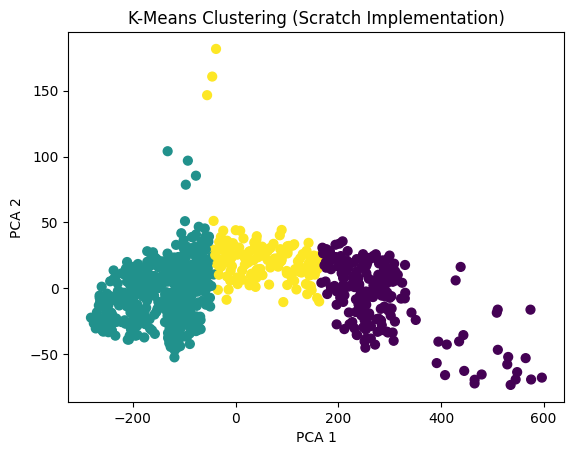

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', s=40)
plt.title("K-Means Clustering (Scratch Implementation)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


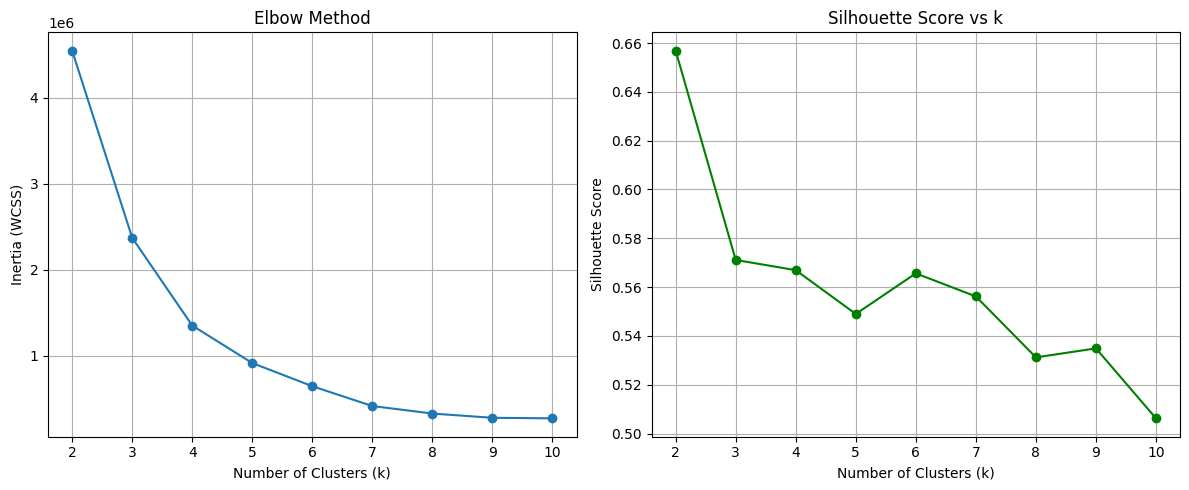

In [4]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load wine dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
X_np = X.values  # Convert to numpy for distance calculations

# --- KMeans from Scratch ---
class KMeansScratch:
    def __init__(self, k=3, max_iters=100, random_state=42):
        self.k = k
        self.max_iters = max_iters
        self.random_state = random_state

    def initialize_centroids(self, X):
        np.random.seed(self.random_state)
        idx = np.random.permutation(X.shape[0])[:self.k]
        return X[idx]

    def assign_clusters(self, X, centroids):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        return np.argmin(distances, axis=1)

    def update_centroids(self, X, labels):
        return np.array([X[labels == i].mean(axis=0) for i in range(self.k)])

    def fit(self, X):
        X = np.array(X)
        self.centroids = self.initialize_centroids(X)
        for _ in range(self.max_iters):
            self.labels = self.assign_clusters(X, self.centroids)
            new_centroids = self.update_centroids(X, self.labels)
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids
        return self.labels

    def predict(self, X):
        return self.assign_clusters(np.array(X), self.centroids)

# --- Elbow Method and Silhouette Score ---
inertias = []
silhouettes = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeansScratch(k=k)
    labels = kmeans.fit(X_np)

    # Inertia
    inertia = np.sum([np.linalg.norm(X_np[i] - kmeans.centroids[labels[i]])**2 for i in range(len(X_np))])
    inertias.append(inertia)

    # Silhouette Score
    sil_score = silhouette_score(X_np, labels)
    silhouettes.append(sil_score)

# --- Plot Elbow Method ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.grid(True)

# --- Plot Silhouette Score ---
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouettes, marker='o', color='green')
plt.title("Silhouette Score vs k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()
